# Equatorial Mapping

In this tutorial we will explore how to map a TREx mosaic from the ionosphere to the magnetic equator using two models supported by the IRBEM library: IGRF and T89.

In [1]:
import matplotlib.pyplot as plt
import asilib
import asilib.asi
import numpy as np
import matplotlib.gridspec

import IRBEM

In [2]:
time = '2021-11-04T06:59'
location_codes = ['FSMI', 'LUCK', 'RABB', 'PINA', 'GILL']
map_alt = 110
min_elevation = 10
lon_bounds=(-125, -75)
lat_bounds=(40, 70)

In [3]:
asis = asilib.Imagers(
    [asilib.asi.trex_rgb(location_code, time=time) 
    for location_code in location_codes]
    )

Transition Region Explorer (TREx) RGB data is courtesy of Space Environment Canada (space-environment.ca). Use of the data must adhere to the rules of the road for that dataset.  Please see below for the required data acknowledgement. Any questions about the TREx instrumentation or data should be directed to the University of Calgary, Emma Spanswick (elspansw@ucalgary.ca) and/or Eric Donovan (edonovan@ucalgary.ca).

“The Transition Region Explorer RGB (TREx RGB) is a joint Canada Foundation for Innovation and Canadian Space Agency project developed by the University of Calgary. TREx-RGB is operated and maintained by Space Environment Canada with the support of the Canadian Space Agency (CSA) [23SUGOSEC].”


Let's map the images with the IGRF magnetic field model

In [4]:
_irbem_obj = IRBEM.MagFields(kext='None')
_coords_obj = IRBEM.Coords()

def igrf_model(time, lla):
    output_dictionary = _irbem_obj.find_magequator(
        {'datetime':time, 'x1':lla[2], 'x2':lla[0], 'x3':lla[1]},
        {}
        )
    equator_gsm = _coords_obj.transform(time, output_dictionary['XGEO'], 1, 2)  # Convert to GSM coordinates
    return equator_gsm

C:\Users\shumkms1\Documents\research\asilib\asilib\imagers.py:505: UserWarning: This is an experimental method. Its functionality or interface stability is not guaranteed.
  warnings.warn(


Mapping to magnetic equator: |##########################################| 100%


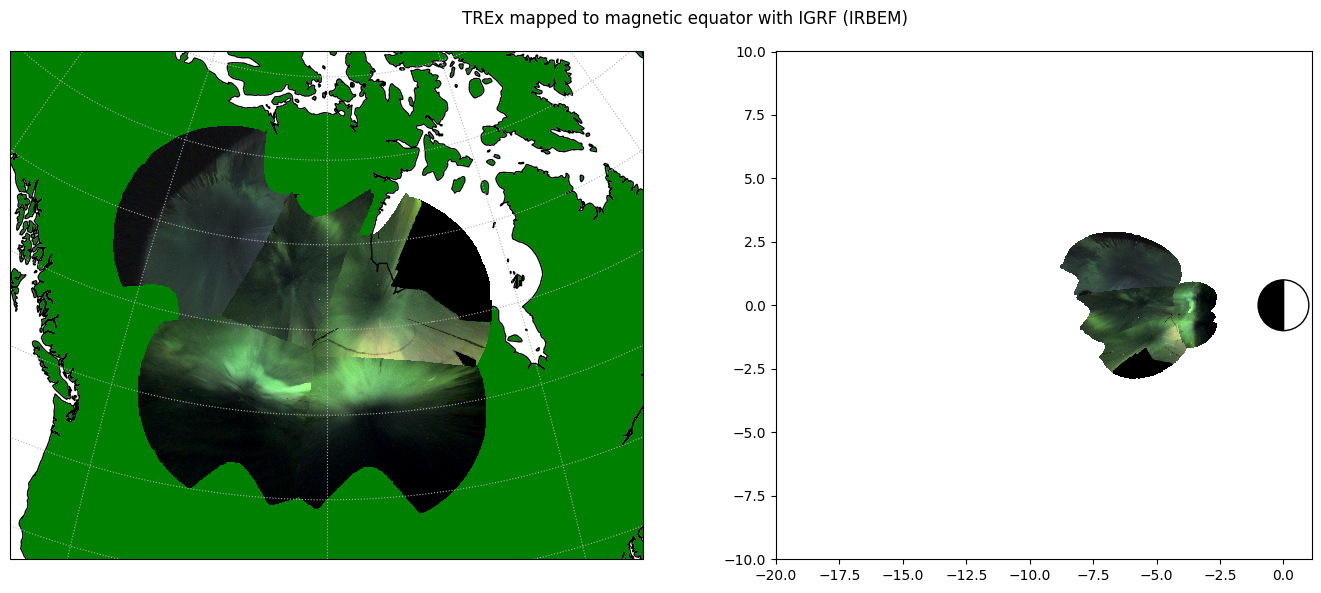

In [5]:
fig = plt.figure(figsize=(14, 6))
gs = matplotlib.gridspec.GridSpec(1, 2, fig, width_ratios=(1, 1))
ax = asilib.map.create_map(fig_ax=(fig, gs[0, 0]), lat_bounds=lat_bounds, lon_bounds=lon_bounds)
bx = fig.add_subplot(gs[0, 1])
bx.set_aspect('equal')

asis.plot_map(ax=ax, asi_label=False)

x_grid, y_grid = np.meshgrid(np.linspace(-20, 1.1, num=1000), np.linspace(-10, 10, num=1001))
asis.plot_map_eq(ax=bx, b_model=igrf_model, x_grid=x_grid, y_grid=y_grid, max_valid_grid_distance=0.1)

fig.suptitle('TREx mapped to magnetic equator with IGRF (IRBEM)')
plt.tight_layout()
plt.show()

Let's map the images with the T89 magnetic field model which includes a stretched magnetotail.

In [6]:
_irbem_obj2 = IRBEM.MagFields(kext='T89')

def t89_model(time, lla):
    output_dictionary = _irbem_obj2.find_magequator(
        {'datetime':time, 'x1':lla[2], 'x2':lla[0], 'x3':lla[1]},
        {'Kp':30}
        )
    equator_gsm = _coords_obj.transform(time, output_dictionary['XGEO'], 1, 2)  # Convert to GSM coordinates
    return equator_gsm

C:\Users\shumkms1\Documents\research\asilib\asilib\imagers.py:505: UserWarning: This is an experimental method. Its functionality or interface stability is not guaranteed.
  warnings.warn(


Mapping to magnetic equator: |##########################################| 100%


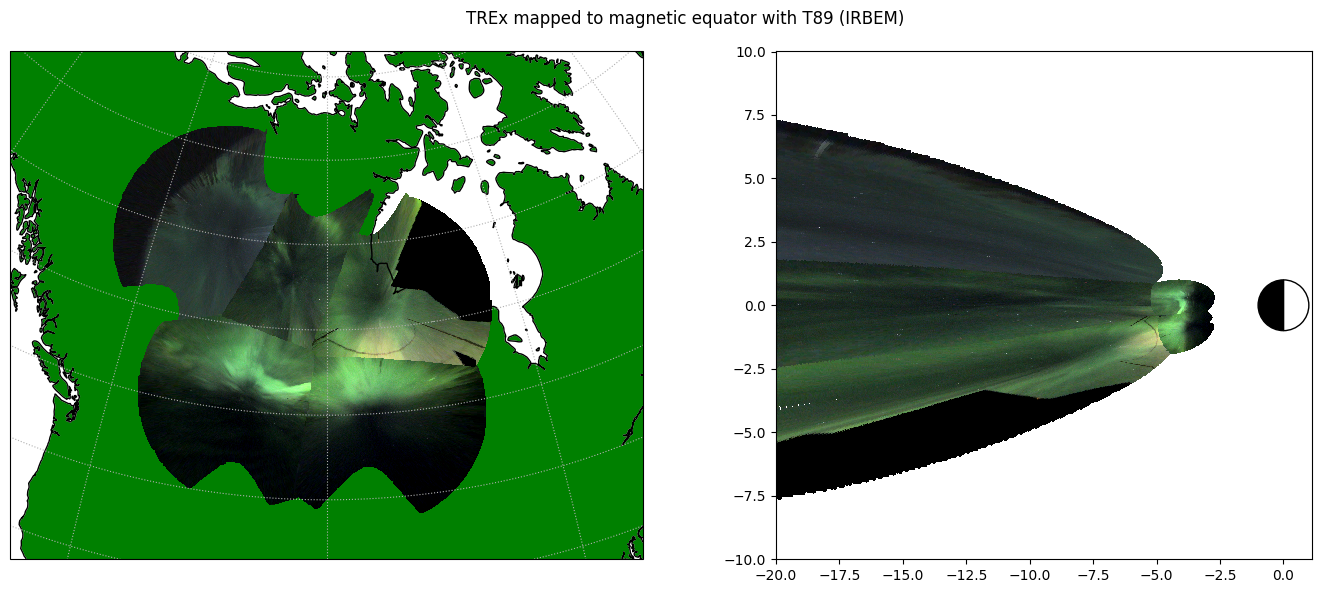

In [7]:
fig = plt.figure(figsize=(14, 6))
gs = matplotlib.gridspec.GridSpec(1, 2, fig, width_ratios=(1, 1))
ax = asilib.map.create_map(fig_ax=(fig, gs[0, 0]), lat_bounds=lat_bounds, lon_bounds=lon_bounds)
bx = fig.add_subplot(gs[0, 1])
bx.set_aspect('equal')

asis.plot_map(ax=ax, asi_label=False)

x_grid, y_grid = np.meshgrid(np.linspace(-20, 1.1, num=1000), np.linspace(-10, 10, num=1001))
asis.plot_map_eq(ax=bx, b_model=t89_model, x_grid=x_grid, y_grid=y_grid, max_valid_grid_distance=0.1)

fig.suptitle('TREx mapped to magnetic equator with T89 (IRBEM)')
plt.tight_layout()
plt.show()

The tail is indeed very stretched, and does not appear realistic.